In [1]:
%pip install openpyxl
%pip install xlsxwriter
%pip install plotly
%pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git
%pip install qiskit

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to c:\users\spill\appdata\local\temp\pip-req-build-h3wzknlv
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit db49d46cbb9cc059ccd0eebdad69c8d28f416f77
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git 'C:\Users\spill\AppData\Local\Temp\pip-req-build-h3wzknlv'


Note: you may need to restart the kernel to use updated packages.


In [2]:
# useful additional packages
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal
from qiskit_optimization.applications import Maxcut, Tsp
from qiskit.algorithms.minimum_eigensolvers import SamplingVQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import SPSA
from qiskit.utils import algorithm_globals
from qiskit.primitives import Sampler
from qiskit_optimization.algorithms import MinimumEigenOptimizer

# Lots of import statements
import timeit
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import openpyxl
import xlsxwriter
from itertools import combinations, groupby
import plotly.express as px

from qiskit import *

import plotly.graph_objects as go
import matplotlib as mpl
import pandas as pd
from IPython.display import clear_output
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt
from qiskit import Aer
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_city
from qiskit.algorithms.optimizers import COBYLA, SLSQP, ADAM
from time import time
from copy import copy
from typing import List

from qiskit_optimization.applications import Maxcut
import matplotlib.pyplot as plt

# from qc_grader.graph_util import display_maxcut_widget, QAOA_widget, graphs
import qc_grader as qc
from qiskit.circuit import Parameter, ParameterVector
from qiskit_optimization import QuadraticProgram
plt.rcParams['figure.dpi'] = 300


In [3]:
# The IBM Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import (QiskitRuntimeService, Session,
                                Estimator as RuntimeEstimator)
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Session, Options

# Saves login credentials to disk, if using new credentials set overwrite = True
QiskitRuntimeService.save_account(
    channel="ibm_quantum", token="60a6f674d4c3af8baad5ad33a982e531af05323b4664c4bf90ef0d6d346bac77b0317ebd2e261f7e4d4e903d5983d3435a32c3e634d0085b89d77cd42209bcfa",
    instance="ibm-q-research-2/marist-ibm-1/main", overwrite=True)

# Initiates QiskitRuntime service
service = QiskitRuntimeService()

# Specify the desired backend (What you want to run your algorithm on)
backend = "ibmq_guadalupe" # for running on the 17qubit machine
# backend = "ibmq_qasm_simulator" # for running on the general use-case simulator
# backend = "simulator_statevector" # for running on the simulator optimized for statevectors


In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import datetime

# Setting a variable to the current time using now()
current_time = datetime.datetime.now()

# Generating a graph of n nodes
n = 12 # Number of nodes in graph, must be correct for program to function


G = nx.Graph()  # Graph G is the Brute Force Graph
G2 = nx.Graph()  # Graph G2 is the VQE Solution Graph
G3 = nx.Graph()  # Graph G3 is the EigenOptimizer Check Solution Graph


G.add_nodes_from(np.arange(0, n, 1))
G2.add_nodes_from(np.arange(0, n, 1))
G3.add_nodes_from(np.arange(0, n, 1))


# List is formatted as the following
#   (x, y, z)
#   x = # of the node (it's identifier)
#   y = The node that x is connected to
#   z = Weight of the line between x and y

elist = [
    (0, 1, 1),
    (0, 2, 5),
    (0, 3, 5),
    (0, 4, 5),
    (0, 5, 1),
    (0, 6, 1),
    (1, 0, 1),
    (1, 2, 5),
    (1, 3, 5),
    (1, 4, 5),
    (1, 5, 1),
    (1, 6, 1),
    (5, 6, 1)
]

elist2 = [
    (0, 1, 1),
    (1, 2, 1),
    (1, 3, 1),
    (1, 4, 1),
    (1, 5, 1),
    (2, 3, 1),
    (3, 4, 1),
    (4, 5, 1),
    (6, 0, 5),
    (7, 0, 5),
    (8, 0, 5),
    (9, 0, 5),
    (10, 0, 5),
    (11, 0, 5),
    (12, 0, 5),
    (13, 0, 5),
    (14, 0, 5),
    (15, 0, 5),
    (16, 0, 5),
    (17, 0, 5),
    (18, 0, 5),
    (19, 0, 5),
    (20, 0, 5),
    (21, 0, 5),
    (22, 0, 5),
    (23, 0, 5),
    (24, 0, 5),
    (25, 0, 5),
    (26, 0, 5),
    (27, 0, 5),
    (28, 0, 5),
    (29, 0, 5),
    (30, 0, 5),
    (31, 0, 5),
    (32, 0, 5),
    (33, 0, 5),
    (34, 0, 5),
    (35, 0, 5),
    (36, 0, 5),
    (37, 0, 5),
    (38, 0, 5),
    (39, 0, 5),
    (40, 0, 5),
    (41, 0, 5),
    (42, 0, 5),
    (43, 0, 5),
    (44, 0, 5),
    (45, 0, 5),
    (46, 0, 5),
    (47, 0, 5),
    (48, 0, 5),
    (49, 0, 5),
    (50, 0, 5),
    (51, 0, 5),
    (52, 0, 5),
    (53, 0, 5),
    (54, 0, 5),
    (55, 0, 5),
    (56, 0, 5),
    (57, 0, 5),
    (58, 0, 5),
    (59, 0, 5),
    (60, 0, 5),
    (61, 0, 5),
    (62, 0, 5),
    (63, 0, 5),
    (64, 0, 5),
    (65, 0, 5),
    (66, 0, 5),
    (67, 0, 5),
    (68, 0, 5),
    (69, 0, 5),
    (70, 0, 5),
    (71, 0, 5),
    (72, 0, 5),
    (73, 0, 5),
    (74, 0, 5),
    (75, 0, 5),
    (76, 0, 5),
    (77, 0, 5),
    (78, 0, 5),
    (79, 0, 5),
    (80, 0, 5),
    (81, 0, 5),
    (82, 0, 5),
    (83, 0, 5),
    (84, 0, 5),
    (85, 0, 5),
    (86, 0, 5),
    (87, 0, 5),
    (88, 0, 5),
    (89, 0, 5),
    (90, 0, 5),
    (91, 0, 5),
    (92, 0, 5),
    (93, 0, 5),
    (94, 0, 5),
    (95, 0, 5),
    (96, 0, 5),
    (97, 0, 5),
    (98, 0, 5),
    (99, 0, 5),
    (100, 0, 5),
    (101, 0, 5),
    (102, 0, 5),
    (103, 0, 5),
    (104, 0, 5),
    (105, 0, 5),
    (106, 0, 5),
    (107, 0, 5),
    (108, 0, 5),
    (109, 0, 5),
    (110, 0, 5),
    (111, 0, 5),
    (112, 0, 5),
    (113, 0, 5),
    (114, 0, 5),
    (115, 0, 5),
    (116, 0, 5),
    (117, 0, 5),
    (118, 0, 5),
    (119, 0, 5),
    (120, 0, 5),
    (121, 0, 5),
    (122, 0, 5),
    (123, 0, 5),
    (124, 0, 5),
    (125, 0, 5),
    (6, 1, 5),
    (7, 1, 5),
    (8, 1, 5),
    (9, 1, 5),
    (10, 1, 5),
    (11, 1, 5),
    (12, 1, 5),
    (13, 1, 5),
    (14, 1, 5),
    (15, 1, 5),
    (16, 1, 5),
    (17, 1, 5),
    (18, 1, 5),
    (19, 1, 5),
    (20, 1, 5),
    (21, 1, 5),
    (22, 1, 5),
    (23, 1, 5),
    (24, 1, 5),
    (25, 1, 5),
    (26, 1, 5),
    (27, 1, 5),
    (28, 1, 5),
    (29, 1, 5),
    (30, 1, 5),
    (31, 1, 5),
    (32, 1, 5),
    (33, 1, 5),
    (34, 1, 5),
    (35, 1, 5),
    (36, 1, 5),
    (37, 1, 5),
    (38, 1, 5),
    (39, 1, 5),
    (40, 1, 5),
    (41, 1, 5),
    (42, 1, 5),
    (43, 1, 5),
    (44, 1, 5),
    (45, 1, 5),
    (46, 1, 5),
    (47, 1, 5),
    (48, 1, 5),
    (49, 1, 5),
    (50, 1, 5),
    (51, 1, 5),
    (52, 1, 5),
    (53, 1, 5),
    (54, 1, 5),
    (55, 1, 5),
    (56, 1, 5),
    (57, 1, 5),
    (58, 1, 5),
    (59, 1, 5),
    (60, 1, 5),
    (61, 1, 5),
    (62, 1, 5),
    (63, 1, 5),
    (64, 1, 5),
    (65, 1, 5),
    (66, 1, 5),
    (67, 1, 5),
    (68, 1, 5),
    (69, 1, 5),
    (70, 1, 5),
    (71, 1, 5),
    (72, 1, 5),
    (73, 1, 5),
    (74, 1, 5),
    (75, 1, 5),
    (76, 1, 5),
    (77, 1, 5),
    (78, 1, 5),
    (79, 1, 5),
    (80, 1, 5),
    (81, 1, 5),
    (82, 1, 5),
    (83, 1, 5),
    (84, 1, 5),
    (85, 1, 5),
    (86, 1, 5),
    (87, 1, 5),
    (88, 1, 5),
    (89, 1, 5),
    (90, 1, 5),
    (91, 1, 5),
    (92, 1, 5),
    (93, 1, 5),
    (94, 1, 5),
    (95, 1, 5),
    (96, 1, 5),
    (97, 1, 5),
    (98, 1, 5),
    (99, 1, 5),
    (100, 1, 5),
    (101, 1, 5),
    (102, 1, 5),
    (103, 1, 5),
    (104, 1, 5),
    (105, 1, 5),
    (106, 1, 5),
    (107, 1, 5),
    (108, 1, 5),
    (109, 1, 5),
    (110, 1, 5),
    (111, 1, 5),
    (112, 1, 5),
    (113, 1, 5),
    (114, 1, 5),
    (115, 1, 5),
    (116, 1, 5),
    (117, 1, 5),
    (118, 1, 5),
    (119, 1, 5),
    (120, 1, 5),
    (121, 1, 5),
    (122, 1, 5),
    (123, 1, 5),
    (124, 1, 5),
    (125, 1, 5)
]

elist3 = [

    (0, 1, 1.19),

    (0, 2, 1.0),

    (0, 3, 1.0),

    (0, 4, 1.19),

    (0, 5, 1.19),

    (0, 6, 1.19),

    (0, 7, 1.0),

    (0, 8, 1.19),

    (0, 9, 1.19),

    (0, 10, 1.19),

    (0, 11, 1.0),

    (1, 0, 1.19),

    (1, 4, 1.19),

    (1, 5, 1.19),

    (1, 6, 1.19),

    (1, 8, 1.19),

    (1, 9, 1.19),

    (1, 10, 1.19),

    (2, 0, 1.0),

    (2, 7, 1.0),

    (3, 0, 1.0),

    (3, 11, 1.0),

    (4, 0, 1.19),

    (4, 1, 1.19),

    (5, 0, 1.19),

    (5, 1, 1.19),

    (6, 0, 1.19),

    (6, 1, 1.19),

    (7, 0, 1.0),

    (7, 2, 1.0),

    (8, 0, 1.19),

    (8, 1, 1.19),

    (9, 0, 1.19),

    (9, 1, 1.19),

    (10, 0, 1.19),

    (10, 1, 1.19),

    (11, 0, 1.0),

    (11, 3, 1.0)]

# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(elist3)
G2.add_weighted_edges_from(elist3)
G3.add_weighted_edges_from(elist3)



colors = ['r' for node in G.nodes()]
colors2 = ['r' for node in G2.nodes()]
colors3 = ['r' for node in G3.nodes()]

pos = nx.spring_layout(G)
pos2 = nx.spring_layout(G2)
pos3 = nx.spring_layout(G3)

style2 = ['solid' for edge in G2.edges()]
style2 = ['solid' for edge in G2.edges()]
style3 = ['solid' for edge in G3.edges()]

def draw_graph(G, colors, pos, style1):
    default_axes = plt.axes(frameon=True)
    # Titles Graph
    plot_title = "BruteForce MaxCut Solution"

    # Label variable for X-axis
    xax = ""

    # Label variable for Y-axis
    yax = ""

    # Calls to title
    plt.title(plot_title)
    plt.xlabel(xax)
    plt.ylabel(yax)

    # Main drawing call of the graph
    # Note: Add stle=style1 in draw edges and in draw to make lines solid or dashed based on conditioning, style1 is the list that contains that styling
    nx.draw_networkx_edges(G, pos=pos)
    nx.draw_networkx(G, node_color=colors, node_size=600,
                     alpha=.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)

    # edge_color : color or array of colors (default='k')
    # Find a way to make cut lines into dotted lines

    # Create 2 edgelists. 1 with the non-cut edges, and another with only the cut edges

    # cut_edges = [(u, v) for u, v in G.edges if lut[u] != lut[v]]
    # uncut_edges = [(u, v) for u, v in G.edges if lut[u] == lut[v]]

    # nx.draw_networkx_edges(G, pos, edgelist=cut_edges,
    #                       style='dashdot', alpha=0.5, width=3)
    # nx.draw_networkx_edges(G, pos, edgelist=uncut_edges, style='solid', width=3)


def draw_graph2(G2, colors2, pos2, style2):
    default_axes = plt.axes(frameon=True)
    # Titles Graph
    plot_title = "QAOA Solution"

    # Label variable for X-axis
    xax = ""

    # Label variable for Y-axis
    yax = ""

    # Calls to title
    plt.title(plot_title)
    plt.xlabel(xax)
    plt.ylabel(yax)

    # Main drawing call of the graph
    style2 = nx.get_edge_attributes(G2, 'style')
    nx.draw_networkx_edges(G2, pos=pos2, style=style2)
    nx.draw_networkx(G2, node_color=colors2, node_size=600,
                     alpha=.8, ax=default_axes, pos=pos2)
    edge_labels = nx.get_edge_attributes(G2, 'weight')
    nx.draw_networkx_edge_labels(G2, pos=pos2, edge_labels=edge_labels)


# Third Graph
def draw_graph3(G3, colors3, pos3, style3):
    default_axes = plt.axes(frameon=True)
    # Titles Graph
    plot_title = "EO Check Solution"

    # Label variable for X-axis
    xax = ""

    # Label variable for Y-axis
    yax = ""

    # Calls to title
    plt.title(plot_title)
    plt.xlabel(xax)
    plt.ylabel(yax)

    # Main drawing call of the graph
    style3 = nx.get_edge_attributes(G3, 'style')
    nx.draw_networkx_edges(G3, pos=pos3, style=style3)
    nx.draw_networkx(G3, node_color=colors3, node_size=600,
                     alpha=.8, ax=default_axes, pos=pos3)
    edge_labels = nx.get_edge_attributes(G3, 'weight')
    nx.draw_networkx_edge_labels(G3, pos=pos3, edge_labels=edge_labels)



In [5]:
""" # Formats date for use in file saving
curTime = current_time.hour + ":" + current_time.minute + "_" + current_time.month + "/" + current_time.date + "/" + current_time.year
nx.draw(draw_graph(G, colors, pos))

# Saves graph as file in directory with timestamp
plt.savefig("BestBrute" + curTime ".png") """

# Computing the weight matrix from the random graph
w = np.zeros([n, n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i, j, default=0)
        if temp != 0:
            w[i, j] = temp['weight']
print("Weight Matrix: ", w)

Weight Matrix:  [[0.   1.19 1.   1.   1.19 1.19 1.19 1.   1.19 1.19 1.19 1.  ]
 [1.19 0.   0.   0.   1.19 1.19 1.19 0.   1.19 1.19 1.19 0.  ]
 [1.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [1.19 1.19 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.19 1.19 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.19 1.19 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.19 1.19 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.19 1.19 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.19 1.19 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


case = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 0.0
case = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 12.329999999999998
case = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 8.329999999999998
case = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 18.279999999999998
case = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 2.0
case = [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 12.329999999999998
case = [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 10.329999999999998
case = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 18.279999999999998
case = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0] cost = 2.0
case = [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0] cost = 12.329999999999998
case = [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0] cost = 10.329999999999998
case = [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0] cost = 18.279999999999998
case = [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0] cost = 4.0
case = [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0] cost = 12.329999999999998
case = [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0] cost = 12.329999999999998
case = [1, 

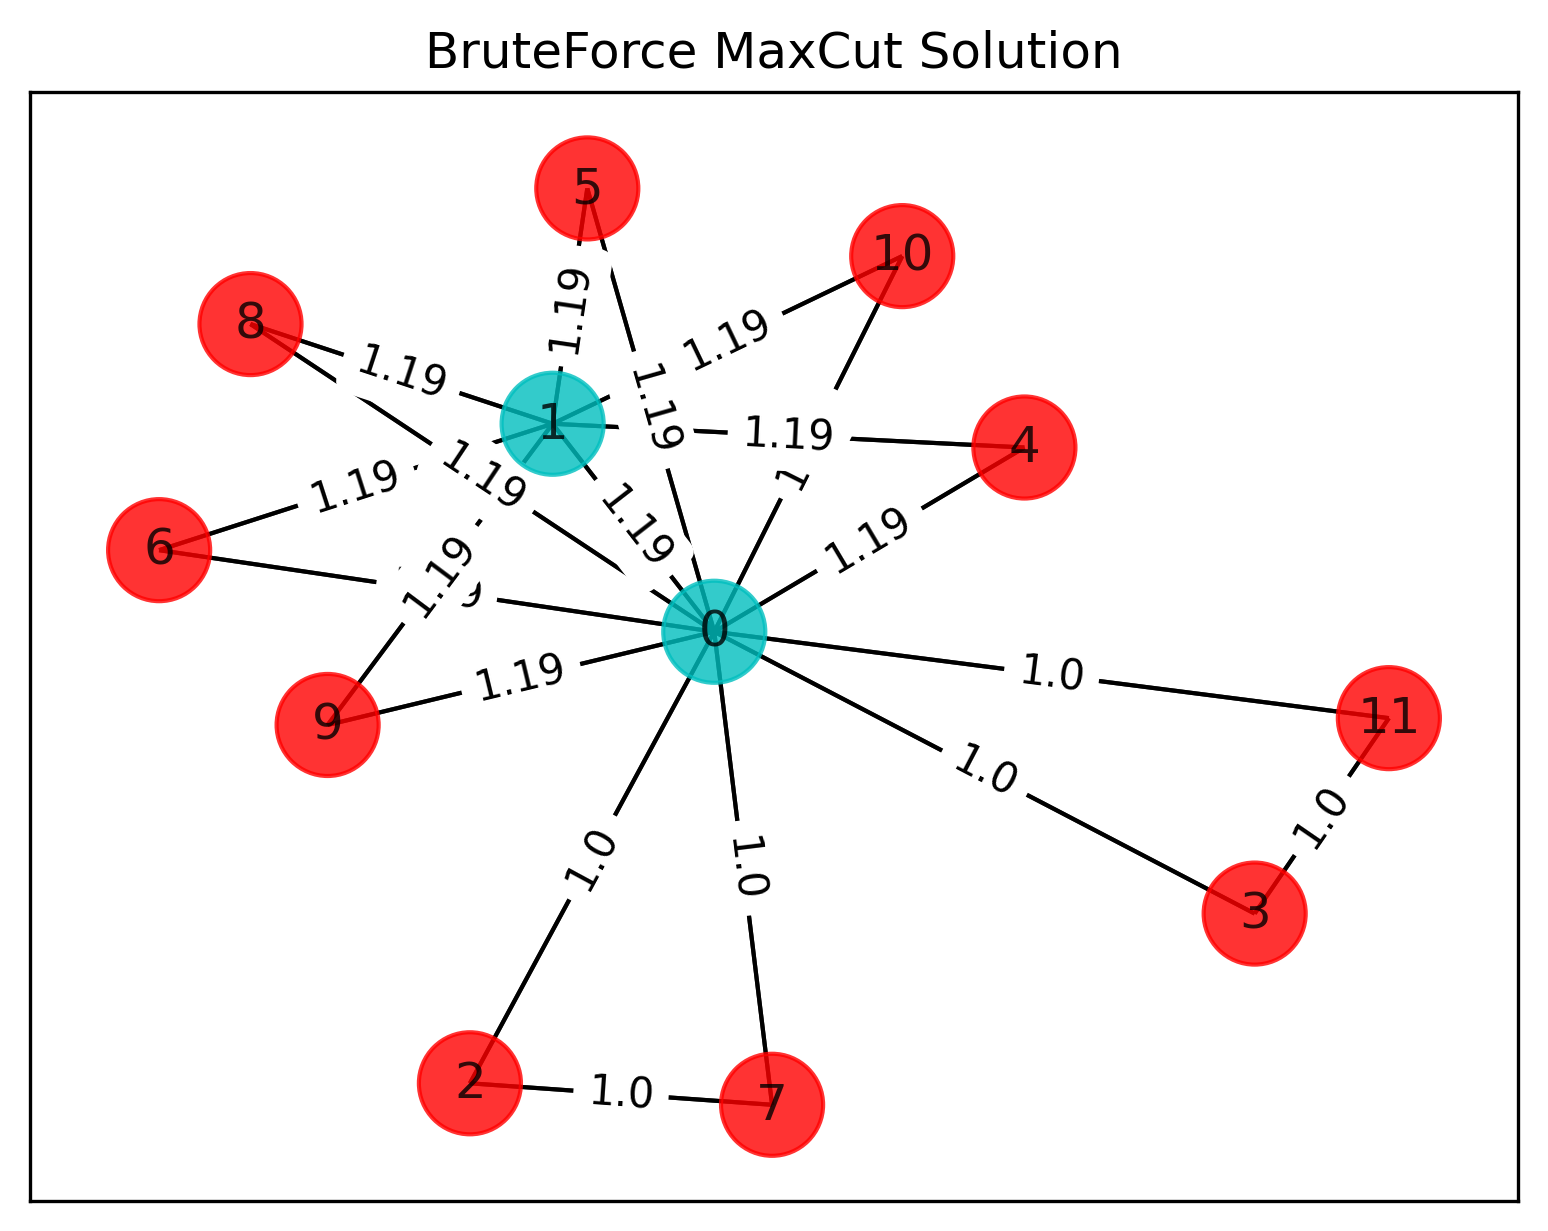

In [6]:

best_cost_brute = 0
for b in range(2**n):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]
    cost = 0
    for i in range(n):
        for j in range(n):
            cost = cost + w[i, j]*x[i]*(1-x[j])
    if best_cost_brute < cost:
        best_cost_brute = cost
        xbest_brute = x
    print('case = ' + str(x) + ' cost = ' + str(cost))

colors = ['r' if xbest_brute[i] == 0 else 'c' for i in range(n)]
style1 = ['-' if xbest_brute[i] == 0 else '--' for i in range(n)]


# Final draw of brute force graph
draw_graph(G, colors, pos, style1)
print('\nBest solution = ' + str(xbest_brute) +
      ' cost = ' + str(best_cost_brute))
print(colors)
print(style1)

In [7]:

# Plotting functions
%config InlineBackend.figure_format = 'retina'

# Define our Qiskit Maxcut Instance
max_cut = Maxcut(w)
qp = max_cut.to_quadratic_program()

# Translate to Ising Hamiltonian
qubitOp, offset = qp.to_ising()

print(qubitOp)

0.595 * IIIIIIIIIIZZ
+ 0.5 * IIIIIIIIIZIZ
+ 0.5 * IIIIIIIIZIIZ
+ 0.595 * IIIIIIIZIIIZ
+ 0.595 * IIIIIIIZIIZI
+ 0.595 * IIIIIIZIIIIZ
+ 0.595 * IIIIIIZIIIZI
+ 0.595 * IIIIIZIIIIIZ
+ 0.595 * IIIIIZIIIIZI
+ 0.5 * IIIIZIIIIIIZ
+ 0.5 * IIIIZIIIIZII
+ 0.595 * IIIZIIIIIIIZ
+ 0.595 * IIIZIIIIIIZI
+ 0.595 * IIZIIIIIIIIZ
+ 0.595 * IIZIIIIIIIZI
+ 0.595 * IZIIIIIIIIIZ
+ 0.595 * IZIIIIIIIIZI
+ 0.5 * ZIIIIIIIIIIZ
+ 0.5 * ZIIIIIIIZIII


In [8]:
from typing import List
from qiskit_optimization import QuadraticProgram
from qiskit.algorithms import QAOA
from qiskit.circuit import Parameter, ParameterVector
from qiskit import QuantumCircuit

def maxcut_cost_fn(graph: nx.Graph, bitstring: List[int]) -> float:
    """
    Computes the maxcut cost function value for a given graph and cut represented by some bitstring
    Args:
        graph: The graph to compute cut values for
        bitstring: A list of integer values '0' or '1' specifying a cut of the graph
    Returns:
        The value of the cut
    """
    # Get the weight matrix of the graph
    weight_matrix = nx.adjacency_matrix(graph).toarray()
    size = weight_matrix.shape[0]
    value = 0.
    for i in range(size):
        for j in range(size):
            value = value + weight_matrix[i][j] * \
                bitstring[i] * (1-bitstring[j])

    return value


def quadratic_program_from_graph(graph: nx.Graph) -> QuadraticProgram:
    """Constructs a quadratic program from a given graph for a MaxCut problem instance.
    Args:
        graph: Underlying graph of the problem.
    Returns:
        QuadraticProgram
    """
    # Get weight matrix of graph
    weight_matrix = nx.adjacency_matrix(graph)
    shape = weight_matrix.shape
    size = shape[0]

    # Build qubo matrix Q from weight matrix W
    qubo_matrix = np.zeros((size, size))
    qubo_vector = np.zeros(size)
    for i in range(size):
        for j in range(size):
            qubo_matrix[i, j] -= weight_matrix[i, j]
    for i in range(size):
        for j in range(size):
            qubo_vector[i] += weight_matrix[i, j]

    quadratic_program = QuadraticProgram('MaxCut as QUBO')
    for i in range(size):
        quadratic_program.binary_var(name=f'x_{i}')

    quadratic_program.maximize(quadratic=qubo_matrix, linear=qubo_vector)

    return quadratic_program
    print(quadratic_program)


def qaoa_circuit(qubo: QuadraticProgram, p: int = 1, params: dict = []) -> QuantumCircuit:
    """
    Given a QUBO instance and the number of layers p, constructs the corresponding parameterized QAOA circuit with p layers.
    Args:
        qubo: The quadratic program instance
        p: The number of layers in the QAOA circuit
    Returns:
        The parameterized QAOA circuit
    """
    size = len(qubo.variables)
    qubo_matrix = qubo.objective.quadratic.to_array(symmetric=True)
    qubo_linearity = qubo.objective.linear.to_array()

    # Prepare the quantum and classical registers
    qaoa_circuit = QuantumCircuit(size, size)
    # Apply the initial layer of Hadamard gates to all qubits
    qaoa_circuit.h(range(size))

    # Create the parameters to be used in the circuit
    if not params:
        gammas = ParameterVector('gamma', p)
        betas = ParameterVector('beta', p)
    else:
        gammas = [params[1]]
        betas = [params[0]]

    # Outer loop to create each layer
    for i in range(p):

        # Apply R_Z rotational gates from cost layer
        for qubit in range(size):
            sum = 0
            for col in range(size):
                sum += qubo_matrix[qubit][col]
            theta = (qubo_linearity[qubit] + sum) * gammas[i]
            qaoa_circuit.rz(theta, qubit)

        # Apply R_ZZ rotational gates for entangled qubit rotations from cost layer
        for j in range(size):
            for k in range(size):
                if j != k:
                    theta = qubo_matrix[j][k] * gammas[i] / 2
                    qaoa_circuit.rzz(theta, j, k)

        # Apply single qubit X - rotations with angle 2*beta_i to all qubits
        for qubit in range(size):
            qaoa_circuit.rx(2 * betas[i], qubit)
            
    return qaoa_circuit


def plot_qaoa_energy_landscape(graph: nx.Graph, cvar: float = None, plot: bool = True):
    
    num_shots = 1000
    seed = 42
    # simulator = Aer.get_backend('qasm_simulator')
    # simulator = imbq_qasm_simulator
    
    # simulator.set_options(seed_simulator=42)

    # Generate circuit
    circuit = qaoa_circuit(qubo=quadratic_program_from_graph(graph), p=1)
    circuit.measure(range(graph.number_of_nodes()),
                    range(graph.number_of_nodes()))

    # Create dictionary with precomputed cut values for all bitstrings
    cut_values = {}
    size = graph.number_of_nodes()
    for i in range(2**size):
        bitstr = '{:b}'.format(i).rjust(size, '0')[::-1]
        x = [int(bit) for bit in bitstr]
        cut_values[bitstr] = maxcut_cost_fn(graph, x)

    # Perform grid search over all parameters
    data_points = []
    max_energy = None
    for beta in np.linspace(0, np.pi, 50):
        for gamma in np.linspace(0, 4*np.pi, 50):
            bound_circuit = circuit.assign_parameters([beta, gamma])
            result = simulator.run(bound_circuit, shots=num_shots).result()
            statevector = result.get_counts(bound_circuit)
            energy = 0
            measured_cuts = []
            for bitstring, count in statevector.items():
                measured_cuts = measured_cuts + [cut_values[bitstring]]*count

            if cvar is None:
                # Calculate the mean of all cut values
                energy = sum(measured_cuts)/num_shots
            else:
                alpha_n = cvar*num_shots
                measured_cuts.sort(reverse=True)
                energy = sum(measured_cuts[:int(alpha_n)])/alpha_n

            # Update optimal parameters
            if max_energy is None or energy > max_energy:
                max_energy = energy
                optimum = {'beta': beta, 'gamma': gamma, 'energy': energy}

            # Update data
            data_points.append(
                {'beta': beta, 'gamma': gamma, 'energy': energy})

    if plot:
        # Create and display surface plot from data_points
        df = pd.DataFrame(data_points)
        df = df.pivot(index='beta', columns='gamma', values='energy')
        matrix = df.to_numpy()
        beta_values = df.index.tolist()
        gamma_values = df.columns.tolist()

        surface_plot = go.Surface(
            x=gamma_values,
            y=beta_values,
            z=matrix,
            coloraxis='coloraxis'
        )
        fig = go.Figure(data=surface_plot)
        fig.show()

    # Return optimum
    return optimum


# Must pass in value for nx_g

In [9]:
from qiskit.quantum_info import Pauli, SparsePauliOp


def get_operator(w: np.ndarray) -> tuple[SparsePauliOp, float]:
    r"""Generate Hamiltonian for the graph partitioning
    Notes:
        Goals:
            1: Separate the vertices into two sets of the same size.
            2: Make sure the number of edges between the two sets is minimized.
        Hamiltonian:
            H = H_A + H_B
            H_A = sum\_{(i,j)\in E}{(1-ZiZj)/2}
            H_B = (sum_{i}{Zi})^2 = sum_{i}{Zi^2}+sum_{i!=j}{ZiZj}
            H_A is for achieving goal 2 and H_B is for achieving goal 1.
    Args:
        w: Adjacency matrix.
    Returns:
        Operator for the Hamiltonian
        A constant shift for the obj function.
    """
    n = len(w)
    pauli_list = []
    coeffs = []
    shift = 0

    for i in range(n):
        for j in range(i):
            if w[i, j] != 0:
                x_p = np.zeros(n, dtype=bool)
                z_p = np.zeros(n, dtype=bool)
                z_p[i] = True
                z_p[j] = True
                pauli_list.append(Pauli((z_p, x_p)))
                coeffs.append(-0.5)
                shift += 0.5

    for i in range(n):
        for j in range(n):
            if i != j:
                x_p = np.zeros(n, dtype=bool)
                z_p = np.zeros(n, dtype=bool)
                z_p[i] = True
                z_p[j] = True
                pauli_list.append(Pauli((z_p, x_p)))
                coeffs.append(1.0)
            else:
                shift += 1

    return SparsePauliOp(pauli_list, coeffs=coeffs), shift


qubit_op, offset = get_operator(w)

print (qubit_op)

SparsePauliOp(['IIIIIIIIIIZZ', 'IIIIIIIIIZIZ', 'IIIIIIIIZIIZ', 'IIIIIIIZIIIZ', 'IIIIIIIZIIZI', 'IIIIIIZIIIIZ', 'IIIIIIZIIIZI', 'IIIIIZIIIIIZ', 'IIIIIZIIIIZI', 'IIIIZIIIIIIZ', 'IIIIZIIIIZII', 'IIIZIIIIIIIZ', 'IIIZIIIIIIZI', 'IIZIIIIIIIIZ', 'IIZIIIIIIIZI', 'IZIIIIIIIIIZ', 'IZIIIIIIIIZI', 'ZIIIIIIIIIIZ', 'ZIIIIIIIZIII', 'IIIIIIIIIIZZ', 'IIIIIIIIIZIZ', 'IIIIIIIIZIIZ', 'IIIIIIIZIIIZ', 'IIIIIIZIIIIZ', 'IIIIIZIIIIIZ', 'IIIIZIIIIIIZ', 'IIIZIIIIIIIZ', 'IIZIIIIIIIIZ', 'IZIIIIIIIIIZ', 'ZIIIIIIIIIIZ', 'IIIIIIIIIIZZ', 'IIIIIIIIIZZI', 'IIIIIIIIZIZI', 'IIIIIIIZIIZI', 'IIIIIIZIIIZI', 'IIIIIZIIIIZI', 'IIIIZIIIIIZI', 'IIIZIIIIIIZI', 'IIZIIIIIIIZI', 'IZIIIIIIIIZI', 'ZIIIIIIIIIZI', 'IIIIIIIIIZIZ', 'IIIIIIIIIZZI', 'IIIIIIIIZZII', 'IIIIIIIZIZII', 'IIIIIIZIIZII', 'IIIIIZIIIZII', 'IIIIZIIIIZII', 'IIIZIIIIIZII', 'IIZIIIIIIZII', 'IZIIIIIIIZII', 'ZIIIIIIIIZII', 'IIIIIIIIZIIZ', 'IIIIIIIIZIZI', 'IIIIIIIIZZII', 'IIIIIIIZZIII', 'IIIIIIZIZIII', 'IIIIIZIIZIII', 'IIIIZIIIZIII', 'IIIZIIIIZIII', 'IIZIIIIIZIII', 'IZIIIIII

In [10]:
from typing import Union

from qiskit.algorithms.minimum_eigensolvers import QAOA
from qiskit.algorithms.optimizers import COBYLA
from qiskit.quantum_info import Statevector
from qiskit.result import QuasiDistribution
from qiskit.utils import algorithm_globals

from qiskit_ibm_runtime import Sampler, Session


def objective_value(x: np.ndarray, w: np.ndarray) -> float:
    """Compute the value of a cut.
    Args:
        x: Binary string as numpy array.
        w: Adjacency matrix.
    Returns:
        Value of the cut.
    """
    X = np.outer(x, (1 - x))
    w_01 = np.where(w != 0, 1, 0)
    return np.sum(w_01 * X)


def bitfield(n: int, L: int) -> list[int]:
    result = np.binary_repr(n, L)
    return [int(digit) for digit in result]  # [2:] to chop off the "0b" part


def sample_most_likely(
    state_vector: Union[QuasiDistribution, Statevector]
) -> np.ndarray:
    """Compute the most likely binary string from state vector.
    Args:
        state_vector: State vector or quasi-distribution.

    Returns:
        Binary string as an array of ints.
    """
    if isinstance(state_vector, QuasiDistribution):
        values = list(state_vector.values())
    else:
        values = state_vector
    n = int(np.log2(len(values)))
    k = np.argmax(np.abs(values))
    x = bitfield(k, n)
    x.reverse()
    return np.asarray(x)

In [12]:
from time import time

algorithm_globals.random_seed = 10598
optimizer = COBYLA()

options = Options()
options.optimization_level = 2
options.resilience_level = 0

with Session(service=service, backend=backend) as session:
    sampler = Sampler(session=session, options=options)
    # callback = build_callback(optimizer, qubit_op, sampler, callback_dict)
    qaoa = QAOA(sampler, optimizer, reps=2)

    start = time()
    result2 = qaoa.compute_minimum_eigenvalue(qubitOp)
    end = time()

    print(result2)
    print(f'execution time (s): {end - start:.2f}')

    # x = sample_most_likely(result.eigenstate)

    session.close()

x2 = max_cut.sample_most_likely(result2.eigenstate)
print('energy:', result2.eigenvalue.real)
print('time:', result2.optimizer_time)
print('max-cut objective:', result2.eigenvalue.real + offset)
print('solution:', x2)
print('solution objective:', qp.objective.evaluate(x))

# plot results
colors3 = ['r' if x2[i] == 0 else 'c' for i in range(n)]
style3 = ['solid' if x2[i] == 0 else 'dashed' for i in range(n)]

draw_graph2(G3, colors3, pos3, style3)

print(f"Objective value computed by QAOA is {objective_value(x2, w)}")


AttributeError: 'NoneType' object has no attribute 'quasi_dists'

In [ ]:
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver
from qiskit.quantum_info import Operator

npme = NumPyMinimumEigensolver()
result3 = npme.compute_minimum_eigenvalue(Operator(qubitOp))

x3 = max_cut.sample_most_likely(result3.eigenstate)

x4 = sample_most_likely(result3.eigenstate)

print(x3)
print(
    f'Objective value computed by the NumPyMinimumEigensolver is {objective_value(x3, w)}')

print('energy:', result3.eigenvalue.real)
# print('time:', result2.optimizer_time)
print('max-cut objective:', result3.eigenvalue.real + offset)
print('solution:', x3)
print('solution objective:', qp.objective.evaluate(x3))


# plot results
colors3 = ['r' if x3[i] == 0 else 'c' for i in range(n)]
style3 = ['solid' if x3[i] == 0 else 'dashed' for i in range(n)]

draw_graph3(G3, colors3, pos3, style3)